<a href="https://colab.research.google.com/github/halattas1/halattas1/blob/main/PeerGradedAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

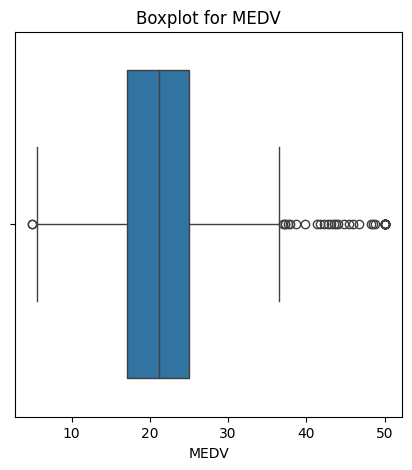

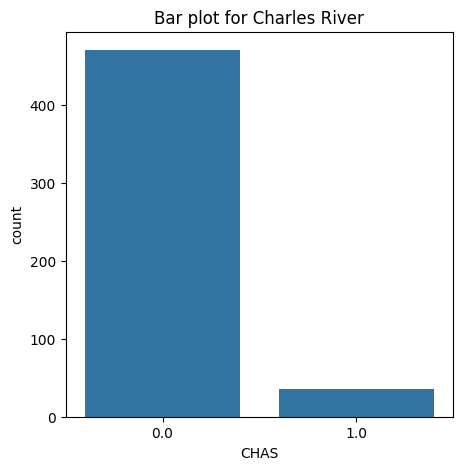

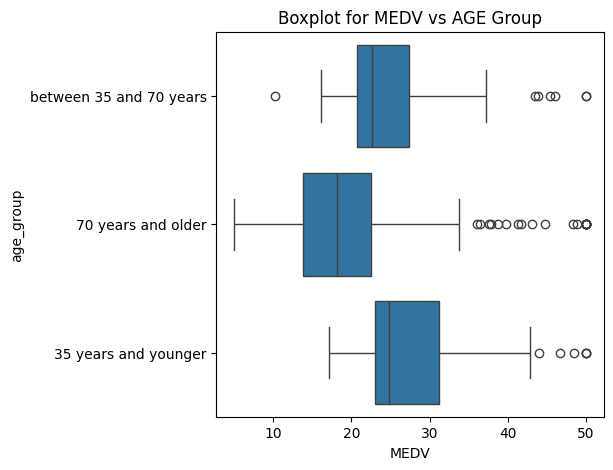

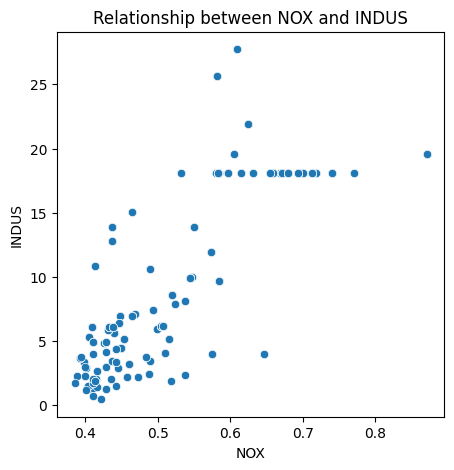

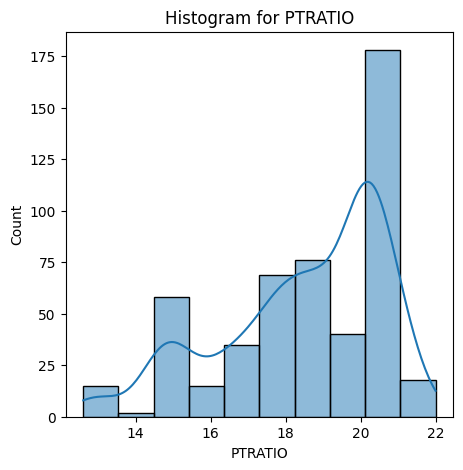

T-test results:
T-statistic = 3.996437466090509, p-value = 7.390623170519905e-05

ANOVA results:
F-statistic = 36.40764999196599, p-value = 1.7105011022702984e-15

Pearson Correlation:
Correlation = 0.763651446920915, p-value = 7.913361061241263e-98

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.21e-08
Time:                        23:46:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Typ

In [4]:
# Install necessary libraries
!pip install pandas seaborn matplotlib scipy statsmodels

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(url)

# Boxplot for the MEDV variable
pyplot.figure(figsize=(5,5))
sns.boxplot(x=boston_df.MEDV)
pyplot.title("Boxplot for MEDV")
pyplot.show()

# Bar plot for the Charles River variable
pyplot.figure(figsize=(5,5))
sns.countplot(x=boston_df.CHAS)
pyplot.title("Bar plot for Charles River")
pyplot.show()

# Boxplot for MEDV vs AGE groups
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

pyplot.figure(figsize=(5,5))
sns.boxplot(x="MEDV", y="age_group", data=boston_df)
pyplot.title("Boxplot for MEDV vs AGE Group")
pyplot.show()

# Scatter plot for NOX vs INDUS
pyplot.figure(figsize=(5,5))
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Relationship between NOX and INDUS")
pyplot.show()

# Histogram for PTRATIO
pyplot.figure(figsize=(5,5))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title("Histogram for PTRATIO")
pyplot.show()

# T-test: MEDV by CHAS
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(group1, group0)
print("T-test results:")
print(f"T-statistic = {t_stat}, p-value = {p_val}")

# ANOVA: MEDV by AGE group
bins = [0, 35, 70, 100]
labels = ['<=35', '36-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)
groups = [boston_df[boston_df['AGE_GROUP'] == label]['MEDV'] for label in labels]
f_stat, p_val_anova = scipy.stats.f_oneway(*groups)
print("\nANOVA results:")
print(f"F-statistic = {f_stat}, p-value = {p_val_anova}")

# Pearson correlation between NOX and INDUS
corr_stat, corr_p = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation:")
print(f"Correlation = {corr_stat}, p-value = {corr_p}")

# Regression analysis: DIS vs MEDV
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print("\nOLS Regression Results:")
print(model.summary())
